In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ecom = pd.read_csv('C:\\Users\\User\\python for data science\\Refactored_Py_DS_ML_Bootcamp-master\\11-Linear-Regression\\Ecommerce Customers')

In [7]:
sns.set_style('darkgrid')

In [3]:
ecom.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [5]:
ecom.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


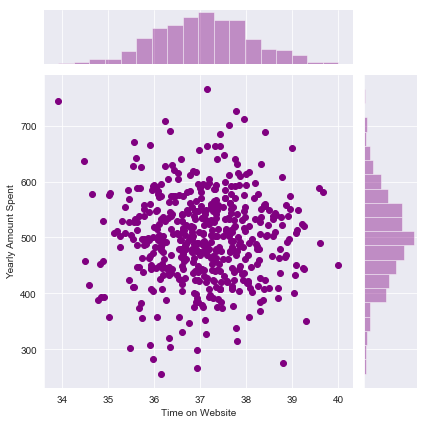

In [16]:
sns.jointplot('Time on Website', 'Yearly Amount Spent', data=ecom,color='purple')

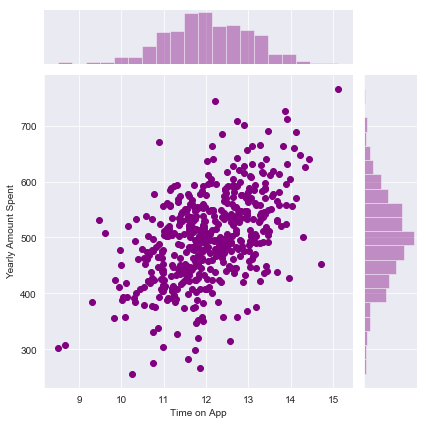

In [17]:
sns.jointplot('Time on App', 'Yearly Amount Spent', data=ecom,color='purple')

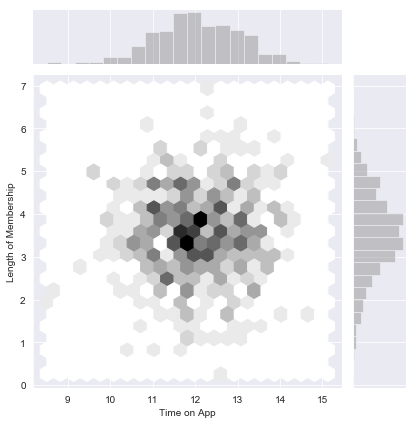

In [19]:
sns.jointplot('Time on App', 'Length of Membership', data=ecom,color='grey',kind='hex')

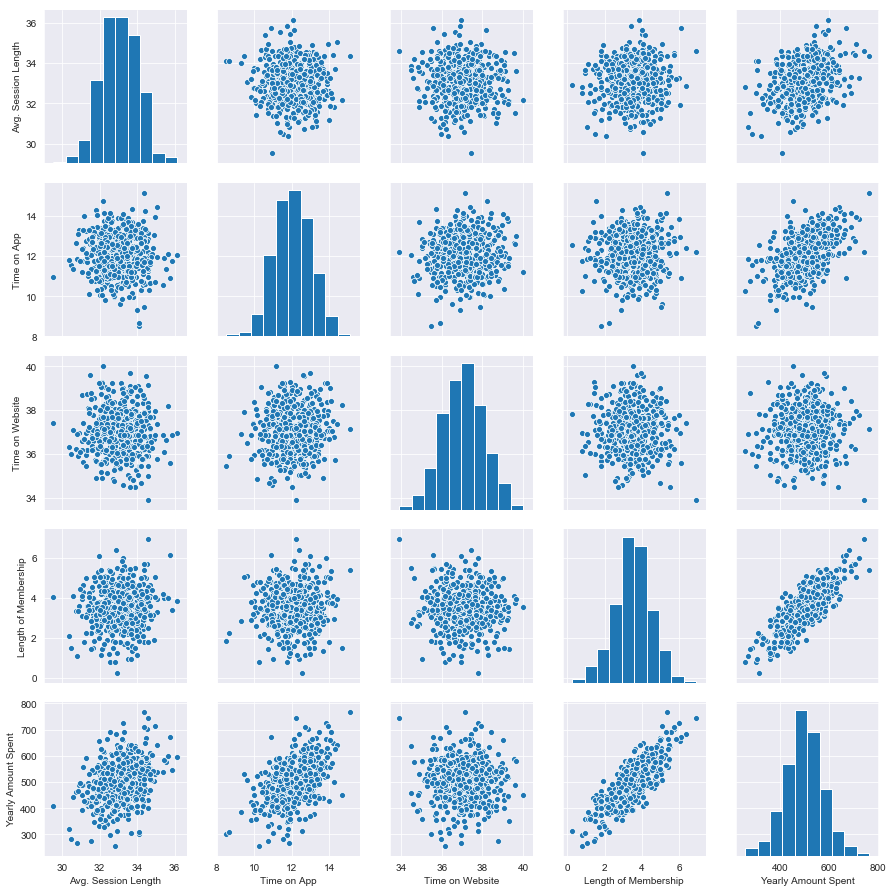

In [20]:
sns.pairplot(ecom)

In [21]:
#length of membership is most correlated with yearly amount spent

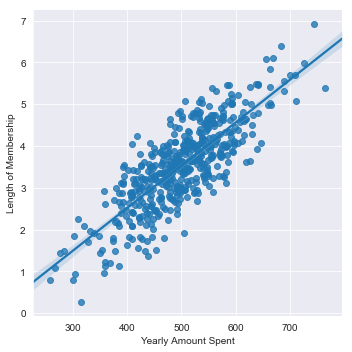

In [22]:
sns.lmplot('Yearly Amount Spent','Length of Membership',data=ecom)

## Predicting yearly amount spent based on other features

In [23]:
ecom.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [32]:
X = ecom[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

In [33]:
y = ecom['Yearly Amount Spent']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 101)

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lm = LinearRegression()

In [38]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
print(lm.intercept_)

-1047.9327822502387


In [40]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [41]:
predictions = lm.predict(X_test)

In [42]:
predictions

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

Text(0, 0.5, 'Predicted Y')

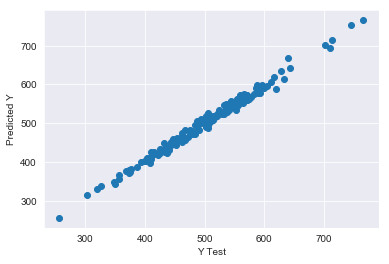

In [56]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [44]:
from sklearn import metrics

In [46]:
# mean absolute error
mae = metrics.mean_absolute_error(y_test,predictions)

In [47]:
mae

7.228148653430853

In [48]:
# mean squared error
mse = metrics.mean_squared_error(y_test,predictions)

In [49]:
mse

79.81305165097487

In [50]:
# root mean squared error
rmse = np.sqrt(metrics.mean_squared_error(y_test,predictions))

In [51]:
rmse

8.933815066978656

(array([ 1.,  5., 15., 34., 36., 27., 25.,  5.,  1.,  1.]),
 array([-26.95573072, -21.26030045, -15.56487019,  -9.86943992,
         -4.17400966,   1.5214206 ,   7.21685087,  12.91228113,
         18.6077114 ,  24.30314166,  29.99857192]),
 <a list of 10 Patch objects>)

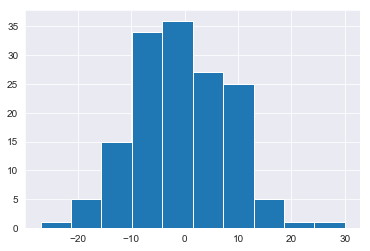

In [52]:
plt.hist(y_test - predictions)

In [53]:
# coefficients 

In [54]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns = ['Coefficient'])

In [55]:
cdf

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
